In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''total number of classes'''
num_classes = 10

'''number of input vector attributes'''
num_features = 784

'''neural network learning rate'''
learning_rate = 0.001

'''maximum number of epochs'''
training_steps = 3000

'''recalculate network weights on its random subset of batch_size elements'''
batch_size = 256

'''every 100 iterations we show the current value of the loss function and accuracy'''
display_step = 100

'''number of neurons of the 1st layer'''
n_hidden_1 = 128

'''number of neurons of the 2st layer'''
n_hidden_2 = 256

In [3]:
''' Load dataset'''
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

'''Convert integer pixels to float32'''
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

'''Convert 28x28 pixel matrices to a vector of 784 elements'''
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

''' Normalize pixel values'''
x_train, x_test = x_train / 255., x_test / 255.

'''Shuffle the training data'''
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
print(x_train.shape)
print(y_train.shape)
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

(60000, 784)
(60000,)


In [4]:
'''Create a neural network'''

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation != 0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)


class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1)

    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2)

    '''Output layer'''
    self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes)

  def __call__(self, x):
    x1 = self.layer_1(x, activation=0)
    x2 = self.layer_2(x1, activation=0)
    x3 = self.layer_3(x2, activation=1)

    return x3

In [5]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

def accuracy(y_pred, y_true):
    """accuracy as a quality metric"""
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
'''Creating an instance of a neural network'''
neural_net = NN(name="mnist")

def train(nn, input_x, output_y):
    """neural network training"""
  optimizer = tf.optimizers.SGD(learning_rate)

  with tf.GradientTape() as g:
    '''Activation of automatic differentiation'''
    pred = neural_net(input_x)
    loss = cross_entropy(pred, output_y)

    '''list of parameters to be optimized'''
    trainable_variables = nn.trainable_variables

    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

Step: 0, Loss: 2515.46484375, Accuracy: 0.09375
Step: 100, Loss: 291.409912109375, Accuracy: 0.73828125
Step: 200, Loss: 196.43287658691406, Accuracy: 0.78125
Step: 300, Loss: 206.16104125976562, Accuracy: 0.78125
Step: 400, Loss: 187.4193115234375, Accuracy: 0.78515625
Step: 500, Loss: 129.65640258789062, Accuracy: 0.86328125
Step: 600, Loss: 152.75498962402344, Accuracy: 0.796875
Step: 700, Loss: 100.68228149414062, Accuracy: 0.875
Step: 800, Loss: 124.38232421875, Accuracy: 0.859375
Step: 900, Loss: 104.81793975830078, Accuracy: 0.8671875
Step: 1000, Loss: 115.51507568359375, Accuracy: 0.87890625
Step: 1100, Loss: 82.86070251464844, Accuracy: 0.89453125
Step: 1200, Loss: 104.81028747558594, Accuracy: 0.87890625
Step: 1300, Loss: 84.15357208251953, Accuracy: 0.8984375
Step: 1400, Loss: 71.02800750732422, Accuracy: 0.9140625
Step: 1500, Loss: 57.8802490234375, Accuracy: 0.921875
Step: 1600, Loss: 78.69611358642578, Accuracy: 0.8984375
Step: 1700, Loss: 101.24496459960938, Accuracy: 0.

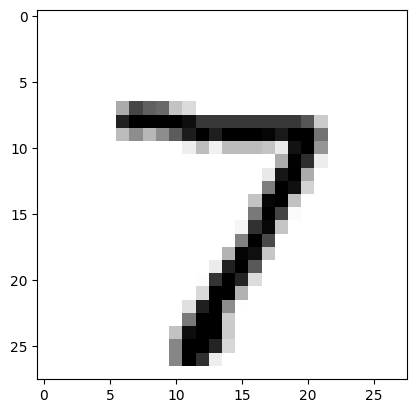

Original Labels: 7
Model prediction: 7


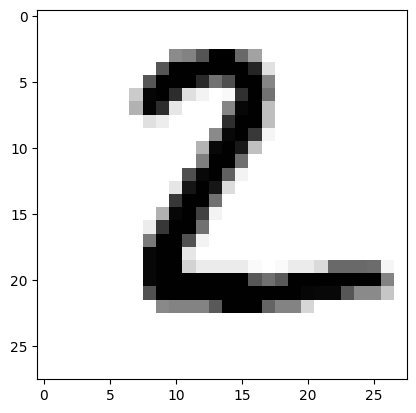

Original Labels: 2
Model prediction: 2


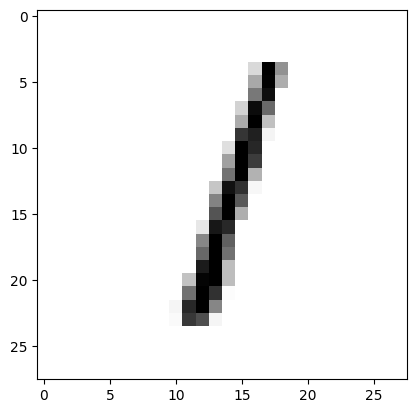

Original Labels: 1
Model prediction: 1


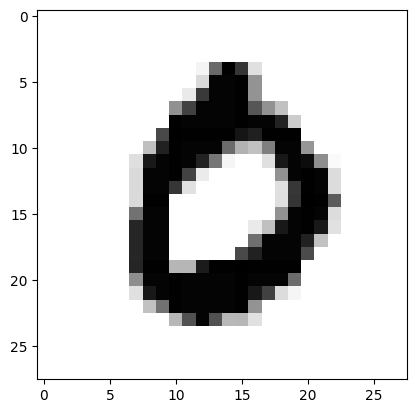

Original Labels: 0
Model prediction: 0


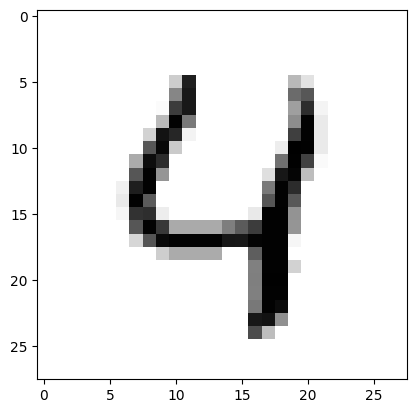

Original Labels: 4
Model prediction: 4


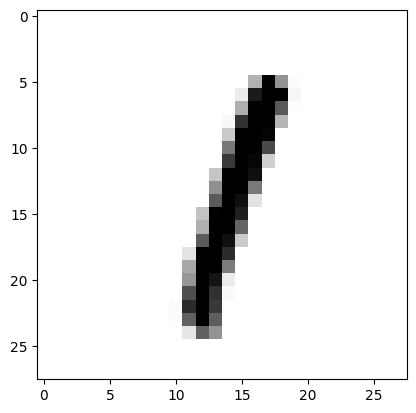

Original Labels: 1
Model prediction: 1


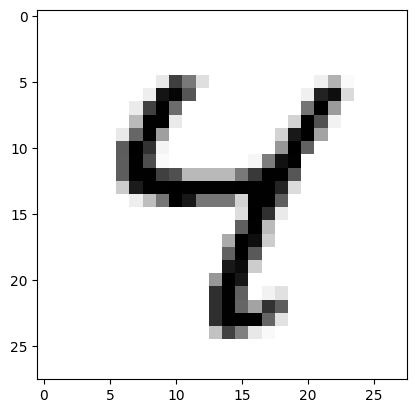

Original Labels: 4
Model prediction: 4


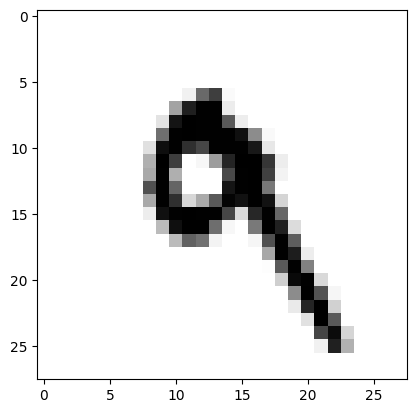

Original Labels: 9
Model prediction: 9


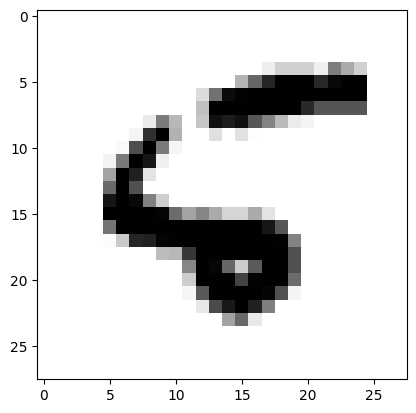

Original Labels: 5
Model prediction: 6


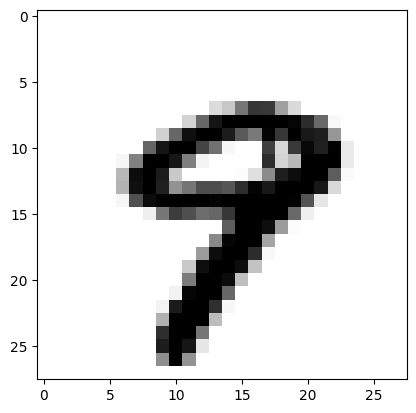

Original Labels: 9
Model prediction: 9


In [7]:
'''Network training'''

loss_history = []
accuracy_history = []

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps)):
    '''update the weights of the neural network'''
    train(neural_net, batch_x, batch_y)

    if step % display_step == 0:
        pred = neural_net(batch_x)

        current_loss = cross_entropy(pred, batch_y)
        loss_history.append(current_loss)

        current_accuracy = accuracy(pred, batch_y)
        accuracy_history.append(current_accuracy)
        print(f"Step: {step}, Loss: {current_loss}, Accuracy: {current_accuracy}")


pred = neural_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))


n_images = 10
predictions = neural_net(x_test)
for i in range(n_images):
    model_prediction = np.argmax(predictions.numpy()[i])
    plt.imshow(np.reshape(x_test[i], [28, 28]), cmap='gray_r')
    plt.show()
    print("Original Labels: %s" % y_test[i])
    print("Model prediction: %s" % model_prediction)

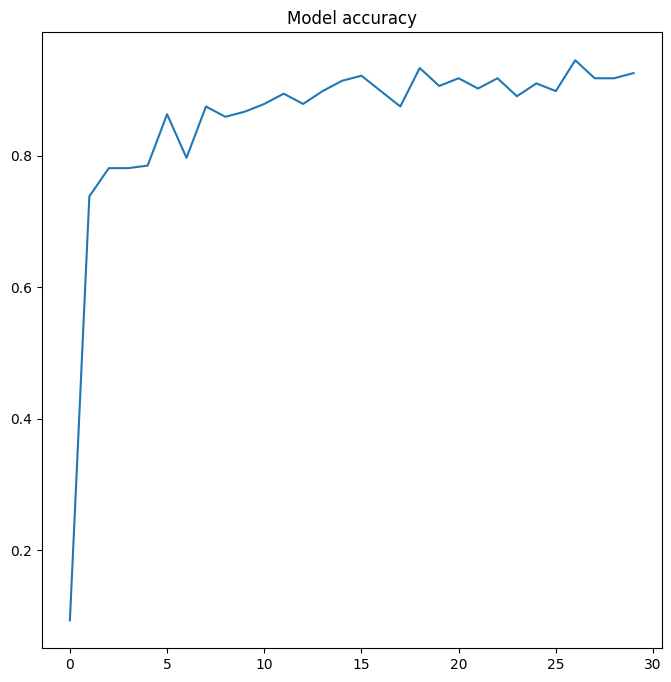

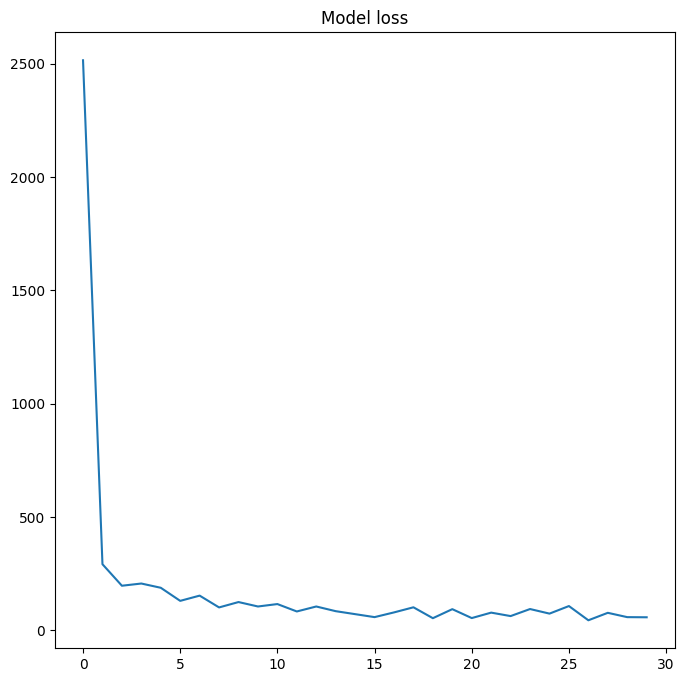

In [8]:
plt.figure(figsize=(8,8))
plt.plot(accuracy_history)
plt.title('Model accuracy')
plt.show()


plt.figure(figsize=(8,8))
plt.plot(loss_history)
plt.title('Model loss')
plt.show()